In [1]:
import pandas as pd
import seaborn as sns

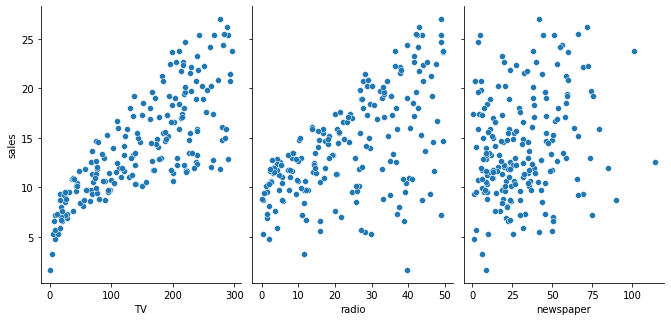

In [2]:
%matplotlib inline
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4.5, aspect=0.7)
#sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4.5, aspect=0.7)


In [16]:
tweets = pd.read_csv('./so_many_tweets.csv')


In [14]:
first_tweet = tweets['Text'][0]         # first tweet in the dataset
words_in_tweet = first_tweet.split(' ') # a list of words in the 
for word in words_in_tweet:             # for each word in the list
    if "$" in word:
        print( "THIS TWEET IS ABOUT", word )



THIS TWEET IS ABOUT $TWTR
THIS TWEET IS ABOUT $AAPL


In [5]:
words_in_tweet


['RT',
 '@j_o_h_n_danger:',
 '$TWTR',
 'now',
 'top',
 'holding',
 'for',
 'Andor,',
 'unseating',
 '$AAPL',
 'http://t.co/vPrx4mUONZ']

In [6]:
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


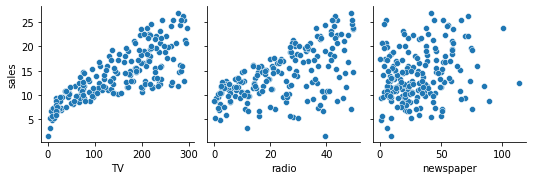

In [12]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales')


In [ ]:
import requests
from BeautifulSoup import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer

# grab postings from the web
texts = []
for i in range(0,1000,10): # cycle through 100 pages of indeed job resources
    soup = BeautifulSoup(requests.get('http://www.indeed.com/jobs?q=data+scientist&start='+str(i)).text)
    texts += [a.text for a in soup.findAll('span', {'class':'summary'})]


print type(texts)

print texts[0]   # first job description


In [ ]:
vect = CountVectorizer(ngram_range=(1,2), stop_words='english')
# make a count vectorizer to get basic counts

matrix = vect.fit_transform(texts)
# fit and learn to the vocabulary in the corpus

print len(vect.get_feature_names())  # how many features are there

freqs = [(word, matrix.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#sort from largest to smallest
for phrase, times in sorted (freqs, key = lambda x: -x[1])[:25]:
    print phrase, times
    
    
    

In [ ]:
print len(texts)